<a href="https://colab.research.google.com/github/patilgauri005/Lab-works-/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gauri Nitin Patil

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

Saving Students.csv to Students.csv


In [ ]:
# Explore dataset
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(400, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hou

In [ ]:
# Step 4: Split dataset (features and target)
X = df[["screen_time_hours"]]
y = df["mental_wellness_index_0_100"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 299.32996262669906
R² Score: 0.24320315180985153


Gauri Nitin Patil - 20230802104

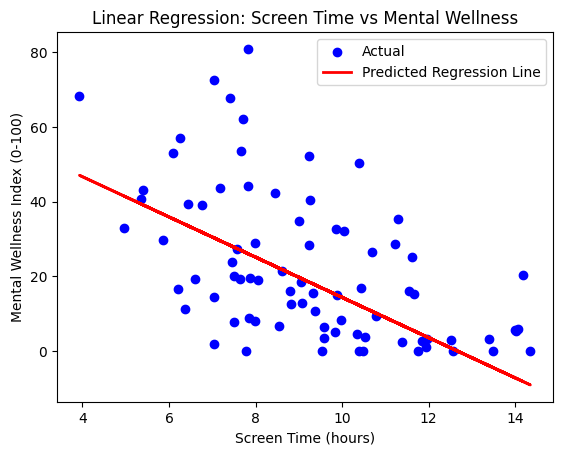

In [ ]:
# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Regression Line")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Mental Wellness Index (0-100)")
plt.title("Linear Regression: Screen Time vs Mental Wellness")
plt.legend()
plt.show()

In [ ]:
#  Classification with Confusion Matrix

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Step 2: Load dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

Saving Students.csv to Students (1).csv


Gauri Nitin Patil - 20230802104

In [ ]:
#Step 2: Load dataset
df = pd.read_csv("ScreenTime vs MentalWellness.csv")

# Drop extra column if present
if "Unnamed: 15" in df.columns:
    df = df.drop(columns=["Unnamed: 15"])

print(df.head())


  user_id  age  gender occupation  work_mode  screen_time_hours  \
0   U0001   33  Female   Employed     Remote              10.79   
1   U0002   28  Female   Employed  In-person               7.40   
2   U0003   35  Female   Employed     Hybrid               9.78   
3   U0004   42    Male   Employed     Hybrid              11.13   
4   U0005   28    Male    Student     Remote              13.22   

   work_screen_hours  leisure_screen_hours  sleep_hours  sleep_quality_1_5  \
0               5.44                  5.35         6.63                  1   
1               0.37                  7.03         8.05                  3   
2               1.09                  8.69         6.48                  1   
3               0.56                 10.57         6.89                  1   
4               4.09                  9.13         5.79                  1   

   stress_level_0_10  productivity_0_100  exercise_minutes_per_week  \
0                9.3                44.7                 

In [ ]:
#Step 3: Preprocess dataset
def categorize_stress(val):
    if val <= 3:
        return "Low"
    elif val <= 6:
        return "Medium"
    else:
        return "High"

df["stress_category"] = df["stress_level_0_10"].apply(categorize_stress)

le = LabelEncoder()
df["stress_category_encoded"] = le.fit_transform(df["stress_category"])



In [ ]:
#Step 4: Split dataset
X = df[["screen_time_hours", "sleep_hours"]]  # features
y = df["stress_category_encoded"]             # target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
#Step 5: Train classifier (Logistic Regression & Decision Tree)
# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Step 6: Predictions
y_pred_log = log_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


In [ ]:
#Step 7: Evaluate accuracy, confusion matrix, classification report.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix (Logistic):\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report (Logistic):\n",
      classification_report(y_test, y_pred_log, target_names=le.classes_))


Logistic Regression Accuracy: 0.8375

Confusion Matrix (Logistic):
 [[65  0  0]
 [ 0  1  0]
 [13  0  1]]

Classification Report (Logistic):
               precision    recall  f1-score   support

        High       0.83      1.00      0.91        65
         Low       1.00      1.00      1.00         1
      Medium       1.00      0.07      0.13        14

    accuracy                           0.84        80
   macro avg       0.94      0.69      0.68        80
weighted avg       0.86      0.84      0.77        80



Gauri Nitin Patil - 20230802104

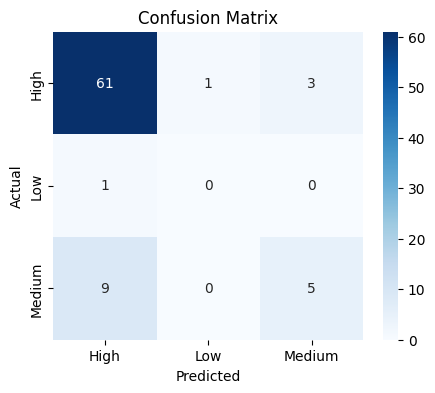

In [ ]:
#Step 8: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Gauri Nitin Patil - 20230802104